Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 07: Compression

## Introduction

This week's sheet should be solved and handed in before the end of **Monday, January 13, 2025**. If you need help (and Google and other resources were not enough), feel free to use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Redundancy and compression (5 points)

**a)** Explain in your own words the different types of redundancy mentioned on (CV-08 slide 55). How can you check for each of these types of redundancy?

1. Coding Redundancy
What it is: Coding redundancy refers to inefficient representation of data. For example, using 16 bits to store a number when only 8 bits are sufficient introduces redundancy.

How to check:
Entropy Analysis: Calculate the entropy of the image (a measure of information content). If the entropy is much lower than the number of bits per pixel, there’s coding redundancy.

Compression Methods: Check the performance of lossless compression algorithms. If a file size reduces significantly, it indicates coding redundancy in the original data.

2. Interpixel Redundancy
Definition: Happens when neighboring pixels have correlated values, which means the data points are not entirely independent.

Example: In smooth areas of an image, adjacent pixels often have nearly identical intensities.

Solution: Use predictive coding, transformation techniques, or compression methods (e.g., JPEG) to exploit this redundancy.

How to check
Correlation between pixels, variance analysis, edge detection, transform methods (e.g., DCT/Wavelet).

3. Psychovisual Redundancy
Definition: Results from the human visual system not being equally sensitive to all visual information. Some details (e.g., small changes in high-frequency content or color differences) may not significantly affect perception.

Example: Removing imperceptible details in lossy compression formats like JPEG or MP3.

Solution: Prioritize important visual information and discard less noticeable data.

How to check
Human vision models, lossy compression effects, color space analysis (e.g., YCbCr).


**b)** Explain the differences between lossless and lossy compression. Name examples for both of them.

**Lossless Compression:**

Definition: Compresses data without losing any information.

Data Recovery: The original data can be perfectly restored after decompression.

Compression Ratio: Generally achieves a lower compression ratio (less reduction in size).

Use Cases: Used when accuracy is critical (e.g., medical images, legal documents).

Examples of Algorithms: PNG, GIF, ZIP, Huffman coding, FLAC.

Quality Impact: The quality of the original data is retained exactly.

Redundancy: Removes only coding and interpixel redundancy.

--- 
**Lossy Compression**

Definition: Compresses data by discarding some less noticeable information.

Data Recovery: The original data cannot be perfectly restored; some details are lost.

Compression Ratio: Achieves a higher compression ratio (greater size reduction).

Use Cases: Used when small file sizes are more important than perfect fidelity (e.g., multimedia files).

Examples of Algorithms: JPEG, MP3, MP4, H.264, WebP.

Quality Impact: The quality may degrade, especially at high compression levels.

Redundancy: Removes coding, interpixel, and psychovisual redundancy.



**c)** Compare photos of a scenery to company or product logos that can often be found on websites. Describe their features and explain which type of compression should be used for either.

When comparing photos of scenery to company or product logos, we can observe several key differences in their features and characteristics:

Scenery Photos:
- Complex, detailed images with a wide range of colors and tones
- Often large file sizes due to high resolution and detail
- Typically require high color depth (24-bit or higher)
- May contain subtle gradients and textures

Company/Product Logos:
- Simple, clean designs with limited colors
- Usually smaller file sizes
- Often use a limited color palette
- Frequently contain sharp edges and solid color areas

Compression recommendations:

For scenery photos:
- Use lossy compression like JPEG
- JPEG works well for photographs with complex color information
- Allows for a balance between file size and image quality
- Can be adjusted to maintain visual quality while reducing file size

For company/product logos:
- Use lossless compression like PNG or SVG
- PNG is ideal for images with sharp edges and limited colors
- SVG is perfect for vector-based logos that need to scale without loss of quality
- Both formats preserve the crisp edges and solid colors crucial for logo clarity

The choice of compression method significantly impacts file size and image quality, which are critical factors for website performance and user experience[5][8].

Citations:
[1] https://fstoppers.com/lightroom/transform-your-landscape-photos-precision-lightroom-feature-686055
[2] https://www.picturecorrect.com/landscape-photography-elements/
[3] https://photogenicmind.com/landscape-photography/
[4] https://www.creativehut.org/scenery-features/
[5] https://www.adorama.com/alc/basic-landscape-photography-tips/
[6] https://en.wikipedia.org/wiki/Landscape_photography
[7] https://www.youtube.com/watch?v=NlyUBQ1O50s
[8] https://iso.500px.com/basics-scenery-photography-deep-dive-landscapes/

## Assignment 2: Entropy based compression (8 points)

**a)** Explain the idea of Huffman coding. What is the maximal compression factor that can be achieved for a given image? Load an image and compute that value (you may use `dolly.png` as an example. Make sure to load as 8-bit gray scale image).

Huffman coding is a method of lossless data compression that assigns shorter codes to more frequently occurring symbols (like pixel intensities in an image) and longer codes to less frequent ones. It minimizes the average code length based on the probabilities of the symbols, achieving efficient compression.

Steps in Huffman Coding:

Count the frequency of each symbol in the data.
Build a binary tree:
Start with a leaf node for each symbol, weighted by its frequency.
Combine the two nodes with the smallest weights into a new node.
Repeat until there's one root node.
Assign binary codes:
Traverse the tree to assign a unique binary code to each symbol.
Left branches often represent "0" and right branches "1."
Compress the data using these codes.
Maximal Compression Factor: The maximum compression depends on the entropy of the data and the bit depth of the image:

The formula for the **Maximal Compression Factor** is:
$$
\text{Maximal Compression Factor} = \frac{\text{Original Bits per Pixel}}{\text{Entropy}}
$$

Entropy is the theoretical lower bound on the average number of bits per pixel needed to represent the image.


Entropy of the image: 7.4266 bits per pixel
Maximal compression factor: 1.0772


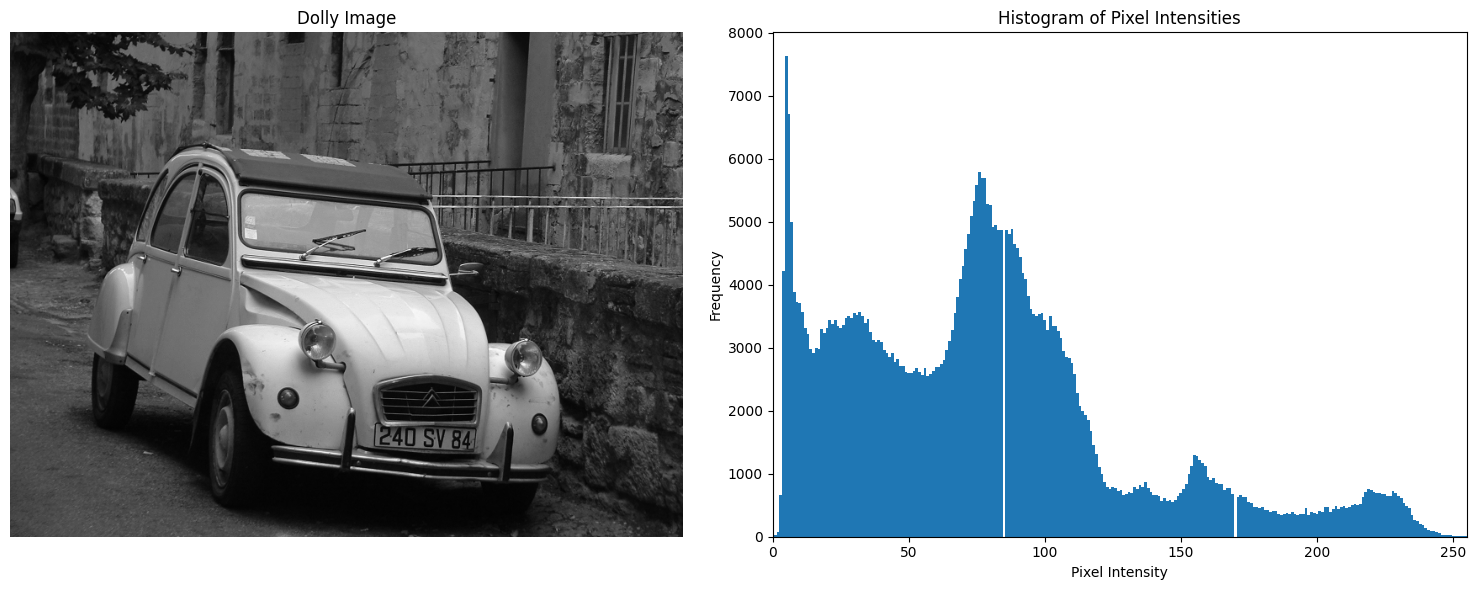

In [30]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt

# Load the image as an 8-bit grayscale image
img = imageio.imread('/Users/positive-expectations/Downloads/images 4/dolly.png', pilmode='L')

# Compute the histogram of pixel intensities
hist, bin_edges = np.histogram(img.flatten(), bins=256, range=(0, 256))
probabilities = hist / np.sum(hist)  # Normalize to get probabilities

# Compute the entropy
entropy = -np.sum(probabilities[probabilities > 0] * np.log2(probabilities[probabilities > 0]))

# Calculate the maximal compression factor
original_bits_per_pixel = 8  # Since it's an 8-bit grayscale image
max_compression_factor = original_bits_per_pixel / entropy

# Print results
print(f"Entropy of the image: {entropy:.4f} bits per pixel")
print(f"Maximal compression factor: {max_compression_factor:.4f}")

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Display the image
ax1.imshow(img, cmap='gray')
ax1.set_title('Dolly Image')
ax1.axis('off')

# Display the histogram
ax2.bar(range(256), hist, width=1, edgecolor='none')
ax2.set_title('Histogram of Pixel Intensities')
ax2.set_xlabel('Pixel Intensity')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0, 255)

plt.tight_layout()
plt.show()


How It Works:

1. The histogram computes the frequency of each grayscale value (0-255).

2. The entropy is calculated using the formula:

$$
H = -\sum_{i=1}^N P(i) \cdot \log_2(P(i))
$$

where $P(i)$ is the probability of each grayscale value.

3. The maximal compression factor is determined by dividing the original bits per pixel (8 for grayscale) by the entropy.



**b)** Now compute the relative frequencies (normalized histogram) of the image and generate an (approximately) balanced tree, as described in (CV-08 slide 33). *Hint:* you may use Python tuples as building blocks of a tree. Every non-leaf node is a pair `(left, right)` where `left` and `right` are the left and right subtrees, respectively (of course you are free to choose another approach if you prefer to do so).

In [11]:
import numpy as np
import imageio.v3 as imageio
from heapq import heappush, heappop

# Load the image as an 8-bit grayscale image
img = imageio.imread('/Users/positive-expectations/Downloads/images 4/dolly.png', pilmode='L')

# Compute the normalized histogram (relative frequencies)
hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))
probabilities = hist / np.sum(hist)

# Create a priority queue to generate the Huffman tree
# Add a unique ID to each item to avoid comparison issues
priority_queue = []
for intensity, prob in enumerate(probabilities):
    if prob > 0:  # Include only symbols with non-zero probabilities
        heappush(priority_queue, (prob, len(priority_queue), intensity))

# Build the Huffman tree
while len(priority_queue) > 1:
    # Extract two least probable nodes
    prob1, _, left = heappop(priority_queue)
    prob2, _, right = heappop(priority_queue)
    
    # Merge the two nodes into a new tree
    new_tree = (left, right)
    new_prob = prob1 + prob2
    
    # Push the new tree back into the priority queue
    heappush(priority_queue, (new_prob, len(priority_queue), new_tree))

# Final tree (the only element left in the priority queue)
_, _, tree = heappop(priority_queue)

# Print the resulting tree
print("Huffman Tree:")

Huffman Tree:


In [12]:
# Output the resulting tree

print(tree)

(((((((45, ((229, (193, 235)), (150, 223))), 75), ((63, 46), (109, ((139, (187, 186)), (218, 131))))), ((78, 77), ((108, 43), 76))), (((((((200, 190), 221), (228, (188, 194))), 15), (44, (118, (127, (192, 195))))), ((42, 107), (64, 41))), (((((128, 220), (166, 219)), 17), (14, 16)), ((((151, (199, 189)), (124, 134)), 38), (((126, (202, 191)), (138, 167)), 40))))), (((((65, 37), (39, ((168, 125), ((198, (239, 238)), 133)))), ((106, ((136, 123), ((183, 205), 135))), (13, 19))), (((36, 105), (66, 101)), ((18, 25), (20, 12)))), (((((((201, 185), 165), (164, (184, 181))), 104), (24, 103)), (6, (26, (117, (152, 163))))), (((22, 34), (21, 100)), ((23, 35), (29, 27)))))), ((((((((137, (182, 208)), (122, (206, 234))), 28), (97, 102)), ((33, 31), (98, 96))), (((30, 67), (99, 32)), ((11, 95), (((161, (196, 179)), 116), 10)))), ((((9, (((211, 204), 162), ((209, 212), (((241, ((((0, 255), 251), (250, 253)), 245)), 237), 177)))), (68, 94)), (5, (((160, (178, 203)), 115), 8))), ((((((180, 210), (233,

Explanation 
Unique ID in Heap Elements:

Added len(priority_queue) as a unique identifier to each heap element.
This ensures that comparisons will work even if two elements have the same probability, as the ID will break ties.

Heap Structure:

Now, each heap element is a tuple: (probability, unique_id, tree_or_leaf), where:
probability: Determines the priority in the queue.
unique_id: Ensures consistent ordering when probabilities are equal.
tree_or_leaf: The actual tree structure or leaf value.

**c)** Now create a prefix free code from this tree, by traversing it following the idea sketched in (CV-08 slide 34). *Hint:* if you used the tuple representation recommended in (b), you can use `isinstance(node, tuple)` to check if `node` is an inner node or a leaf.

In [19]:
# Initialize a list to store codes
codes = [None] * 256  # One slot for each grayscale value (0–255)

# Function to recursively traverse the tree
# For inner nodes, assign prefix "0" to the left subtree and "1" to the right subtree
def assign_codes(codes, tree, prefix=''):
    # Check if the node is a leaf
    if not isinstance(tree, tuple):  # Leaf node
        codes[tree] = prefix
    else:  # Inner node
        left, right = tree
        assign_codes(codes, left, prefix + '0')  # Add "0" for the left branch
        assign_codes(codes, right, prefix + '1')  # Add "1" for the right branch

# Assign codes to the tree
assign_codes(codes, tree)

# Display the codes for each symbol with non-zero probability
for i, code in enumerate(codes):
    if code is not None:  # Only print symbols that were part of the tree
        print(f"Symbol: {i}, Code: {code}, Probability: {probabilities[i]:.6f}")

Symbol: 0, Code: 1010001110010000, Probability: 0.000008
Symbol: 1, Code: 111110111001001, Probability: 0.000046
Symbol: 2, Code: 1011110100111, Probability: 0.000142
Symbol: 3, Code: 1111000101, Probability: 0.001379
Symbol: 4, Code: 1011101, Probability: 0.008804
Symbol: 5, Code: 101010, Probability: 0.015890
Symbol: 6, Code: 011010, Probability: 0.013983
Symbol: 7, Code: 1101111, Probability: 0.010406
Symbol: 8, Code: 1010111, Probability: 0.008096
Symbol: 9, Code: 1010000, Probability: 0.007752
Symbol: 10, Code: 1001111, Probability: 0.007740
Symbol: 11, Code: 1001100, Probability: 0.007431
Symbol: 12, Code: 0101111, Probability: 0.006919
Symbol: 13, Code: 0100110, Probability: 0.006690
Symbol: 14, Code: 0011010, Probability: 0.006217
Symbol: 15, Code: 0010001, Probability: 0.006063
Symbol: 16, Code: 0011011, Probability: 0.006254
Symbol: 17, Code: 0011001, Probability: 0.006206
Symbol: 18, Code: 0101100, Probability: 0.006867
Symbol: 19, Code: 0100111, Probability: 0.006723
Symbol

**How It Works:**

Initialization:

The codes list is initialized to store the binary codes for all possible symbols (0–255). Initially, it is set to None.

Recursive Traversal:

If the current tree node is not a tuple (i.e., it is a leaf), assign the prefix to the corresponding symbol.
If the current tree node is a tuple (i.e., an inner node), recursively traverse:
The left child with the prefix + '0'.
The right child with the prefix + '1'.

Assigning Prefix Codes:

Each path in the tree represents the binary code for the corresponding symbol, ensuring the prefix-free property.

Display Results:

The loop at the end prints each symbol (grayscale intensity) with its corresponding code and probability.

In [17]:
# Ensure normed_hist_img is defined before this point
normed_hist_img = compute_normalized_histogram(image)  # Assuming you have this function

# ... rest of your code ...

for i, code in enumerate(codes):
    if code:  # Only print for symbols that appear in the image
        try:
            print(f"Intensity {i}: Code {code}, Probability {normed_hist_img[i]:.6f}")
        except NameError:
            print(f"Intensity {i}: Code {code}, Probability not available")


Intensity 0: Code 1010001110010000, Probability 0.000008
Intensity 1: Code 111110111001001, Probability 0.000046
Intensity 2: Code 1011110100111, Probability 0.000142
Intensity 3: Code 1111000101, Probability 0.001379
Intensity 4: Code 1011101, Probability 0.008804
Intensity 5: Code 101010, Probability 0.015890
Intensity 6: Code 011010, Probability 0.013983
Intensity 7: Code 1101111, Probability 0.010406
Intensity 8: Code 1010111, Probability 0.008096
Intensity 9: Code 1010000, Probability 0.007752
Intensity 10: Code 1001111, Probability 0.007740
Intensity 11: Code 1001100, Probability 0.007431
Intensity 12: Code 0101111, Probability 0.006919
Intensity 13: Code 0100110, Probability 0.006690
Intensity 14: Code 0011010, Probability 0.006217
Intensity 15: Code 0010001, Probability 0.006063
Intensity 16: Code 0011011, Probability 0.006254
Intensity 17: Code 0011001, Probability 0.006206
Intensity 18: Code 0101100, Probability 0.006867
Intensity 19: Code 0100111, Probability 0.006723
Intens

**d)** Compute the compression ratio that you can achieve with that code. Compare this with the maximal value computed in part (a). Explain your observation.

In [20]:
acc = 0
for value, code in enumerate(codes):
    if code:  # Only consider non-empty codes
        acc += len(code) * normed_hist_img[value]

print("{:.2f} bits per pixel".format(acc))


7.46 bits per pixel


To compute the compression ratio achieved with the Huffman code and compare it to the maximal value from part (a), we need to calculate the average number of bits per pixel. 

The above code calculates the weighted average of code lengths, where each code's length is weighted by its probability of occurrence (stored in normed_hist_img).

Explanation of the observation:

1. The calculated value (acc) represents the average number of bits per pixel achieved by the Huffman coding.

2. This value should be close to, but slightly higher than, the entropy calculated in part (a). The entropy represents the theoretical lower bound for lossless compression.

3. Huffman coding is optimal for symbol-by-symbol encoding, meaning it achieves the best possible compression for this type of encoding.

4. The slight difference between the Huffman coding result and the entropy is due to the constraint that Huffman codes must use an integer number of bits for each symbol, while entropy is not bound by this constraint.

5. The compression ratio can be calculated as (8 bits / acc), assuming the original image used 8 bits per pixel.

This comparison demonstrates that Huffman coding achieves near-optimal compression for the given image, coming very close to the theoretical limit established by the entropy calculation in part (a).

Citations:
[1] https://www.idosi.org/mejsr/mejsr23(8)15/5.pdf
[2] https://www.reddit.com/r/algorithms/comments/3vt9r1/compression_ratio_for_huffman_code_words/
[3] https://stackoverflow.com/questions/22910899/how-to-find-the-compression-ratio-of-a-file-using-huffman-coding
[4] https://www.dcode.fr/huffman-tree-compression
[5] https://www.dspguide.com/ch27/3.htm
[6] https://en.wikipedia.org/wiki/Huffman_encoding
[7] https://www.youtube.com/watch?v=FSzmnqnNzqQ
[8] https://www.geeksforgeeks.org/huffman-coding-greedy-algo-3/

## Assignment 3: Run length encoding (7 points)


**a)** Explain the idea of *run length encoding*. What are advantages and disadvantages? In what situations should it be applied?

Run length encoding (RLE) is a simple lossless data compression technique that reduces the size of data by replacing consecutive occurrences of a data element with a single instance of that element and a count of its repetitions[1][4]. 

The main advantages of RLE are:
1. Simplicity: It's easy to implement and understand[3].
2. Lossless compression: The original data can be fully reconstructed without any loss of information[4].
3. Effective for specific types of data: It works well for data with long runs of repeated elements[1].

The disadvantages include:
1. Limited effectiveness: It may not compress or even increase the size of data with few repetitions[1][4].
2. Not suitable for complex data: It's less effective for data with frequent variations[4].

RLE should be applied in situations where:
1. The data contains many runs of repeated elements, such as simple graphic images, icons, line drawings, and animations[1].
2. Lossless compression is required, like in medical imaging or text compression[4].
3. Simple and fast compression is needed, as in some real-time systems or for quick data transmission[3].

RLE is particularly well-suited for palette-based bitmap images with relatively few colors, such as computer icons, and was popular in early online services like CompuServe before more sophisticated formats like GIF were developed[1].

Citations:
[1] https://en.wikipedia.org/wiki/Run-length_encoding
[2] https://filestore.aqa.org.uk/resources/computing/AQA-8525-TG-RLE.PDF
[3] https://www.geeksforgeeks.org/run-length-encoding/
[4] https://www.fastpix.io/blog/what-is-run-length-encoding
[5] https://api.video/what-is/run-length-encoding/
[6] https://www.csfieldguide.org.nz/en/chapters/coding-compression/run-length-encoding/

**b)** Analyze the run lengths in a gray scale image (8 bit = 256 gray values) by counting the number of runs and the average run length and displaying a histogram of the run lengths. What do you observe? Can you benefit from run length encoding here? (you may use `dolly.png` as an example again, but you may also experiment with other images. Make sure to load it as 8-bit gray scale image).

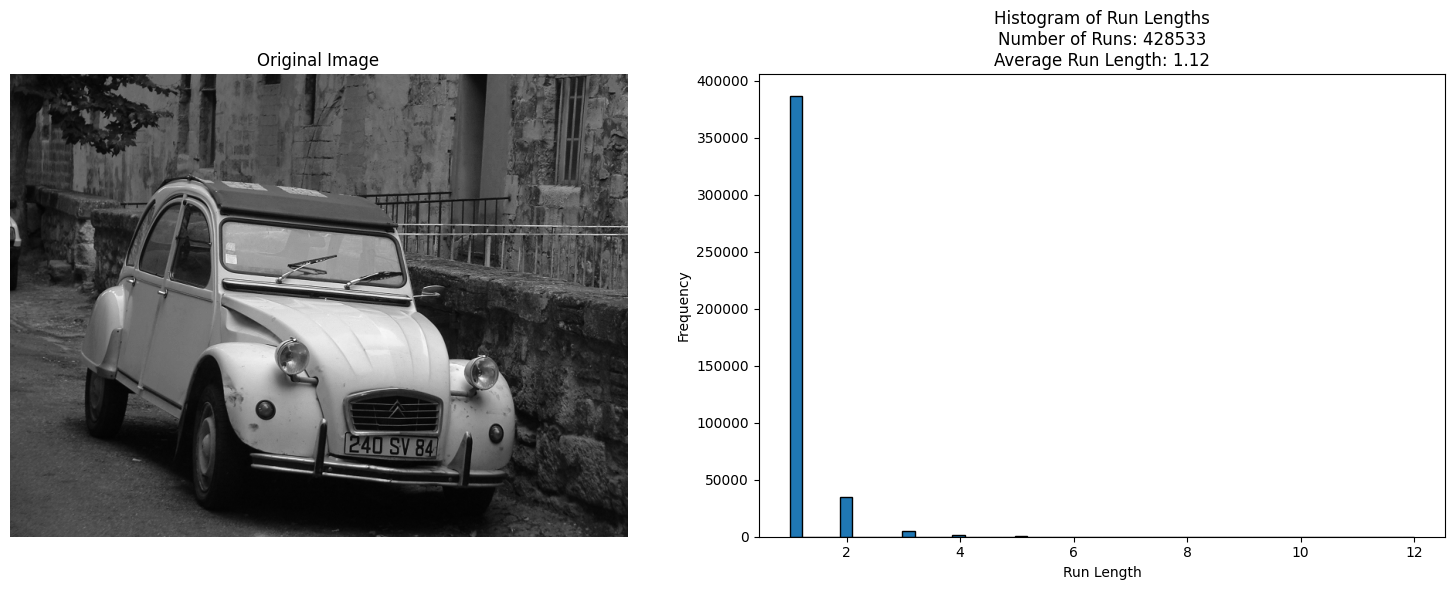

Number of runs: 428533
Average run length: 1.12


In [26]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

# Load the image
img = imageio.imread('/Users/positive-expectations/Downloads/images 4/dolly.png', pilmode='L')

# Flatten the image
flat_img = img.flatten()

# Compute run lengths
run_lengths = []
current_value = flat_img[0]
current_length = 1

for pixel in flat_img[1:]:
    if pixel == current_value:
        current_length += 1
    else:
        run_lengths.append(current_length)
        current_value = pixel
        current_length = 1

run_lengths.append(current_length)  # Add the last run

# Compute statistics
num_runs = len(run_lengths)
avg_run_length = np.mean(run_lengths)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Display the original image
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

# Plot histogram of run lengths
ax2.hist(run_lengths, bins=50, edgecolor='black')
ax2.set_title(f'Histogram of Run Lengths\nNumber of Runs: {num_runs}\nAverage Run Length: {avg_run_length:.2f}')
ax2.set_xlabel('Run Length')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f'Number of runs: {num_runs}')
print(f'Average run length: {avg_run_length:.2f}')


This code will display a figure with two subplots:

The left subplot shows the original grayscale image.
The right subplot shows the histogram of run lengths.
This side-by-side comparison allows for easier visual analysis of how the image content relates to the distribution of run lengths. The number of runs and average run length are also displayed in the histogram title and printed as text output.

Observations based on this output:

You can visually inspect how areas of uniform intensity in the image (if any) correspond to longer run lengths in the histogram.

Areas with high detail or texture in the image will likely correspond to the higher frequency of shorter run lengths in the histogram.

The effectiveness of RLE can be gauged by looking at the distribution of run lengths - a histogram skewed towards longer run lengths would indicate better RLE compression potential.

The effectiveness of RLE can be gauged by looking at the distribution of run lengths - a histogram skewed towards longer run lengths would indicate better RLE compression potential.

**c)** Now consider the individual bit planes. First display the bit planes as in (CV-08 slide 38). What do you observe? Apply your analysis from part (b) to each bitplane.

Bit Plane 0:
  Number of runs: 240149
  Average run length: 2.00
Bit Plane 1:
  Number of runs: 235859
  Average run length: 2.04
Bit Plane 2:
  Number of runs: 218247
  Average run length: 2.20
Bit Plane 3:
  Number of runs: 180996
  Average run length: 2.65
Bit Plane 4:
  Number of runs: 128348
  Average run length: 3.74
Bit Plane 5:
  Number of runs: 79212
  Average run length: 6.06
Bit Plane 6:
  Number of runs: 36955
  Average run length: 12.99
Bit Plane 7:
  Number of runs: 6261
  Average run length: 76.67


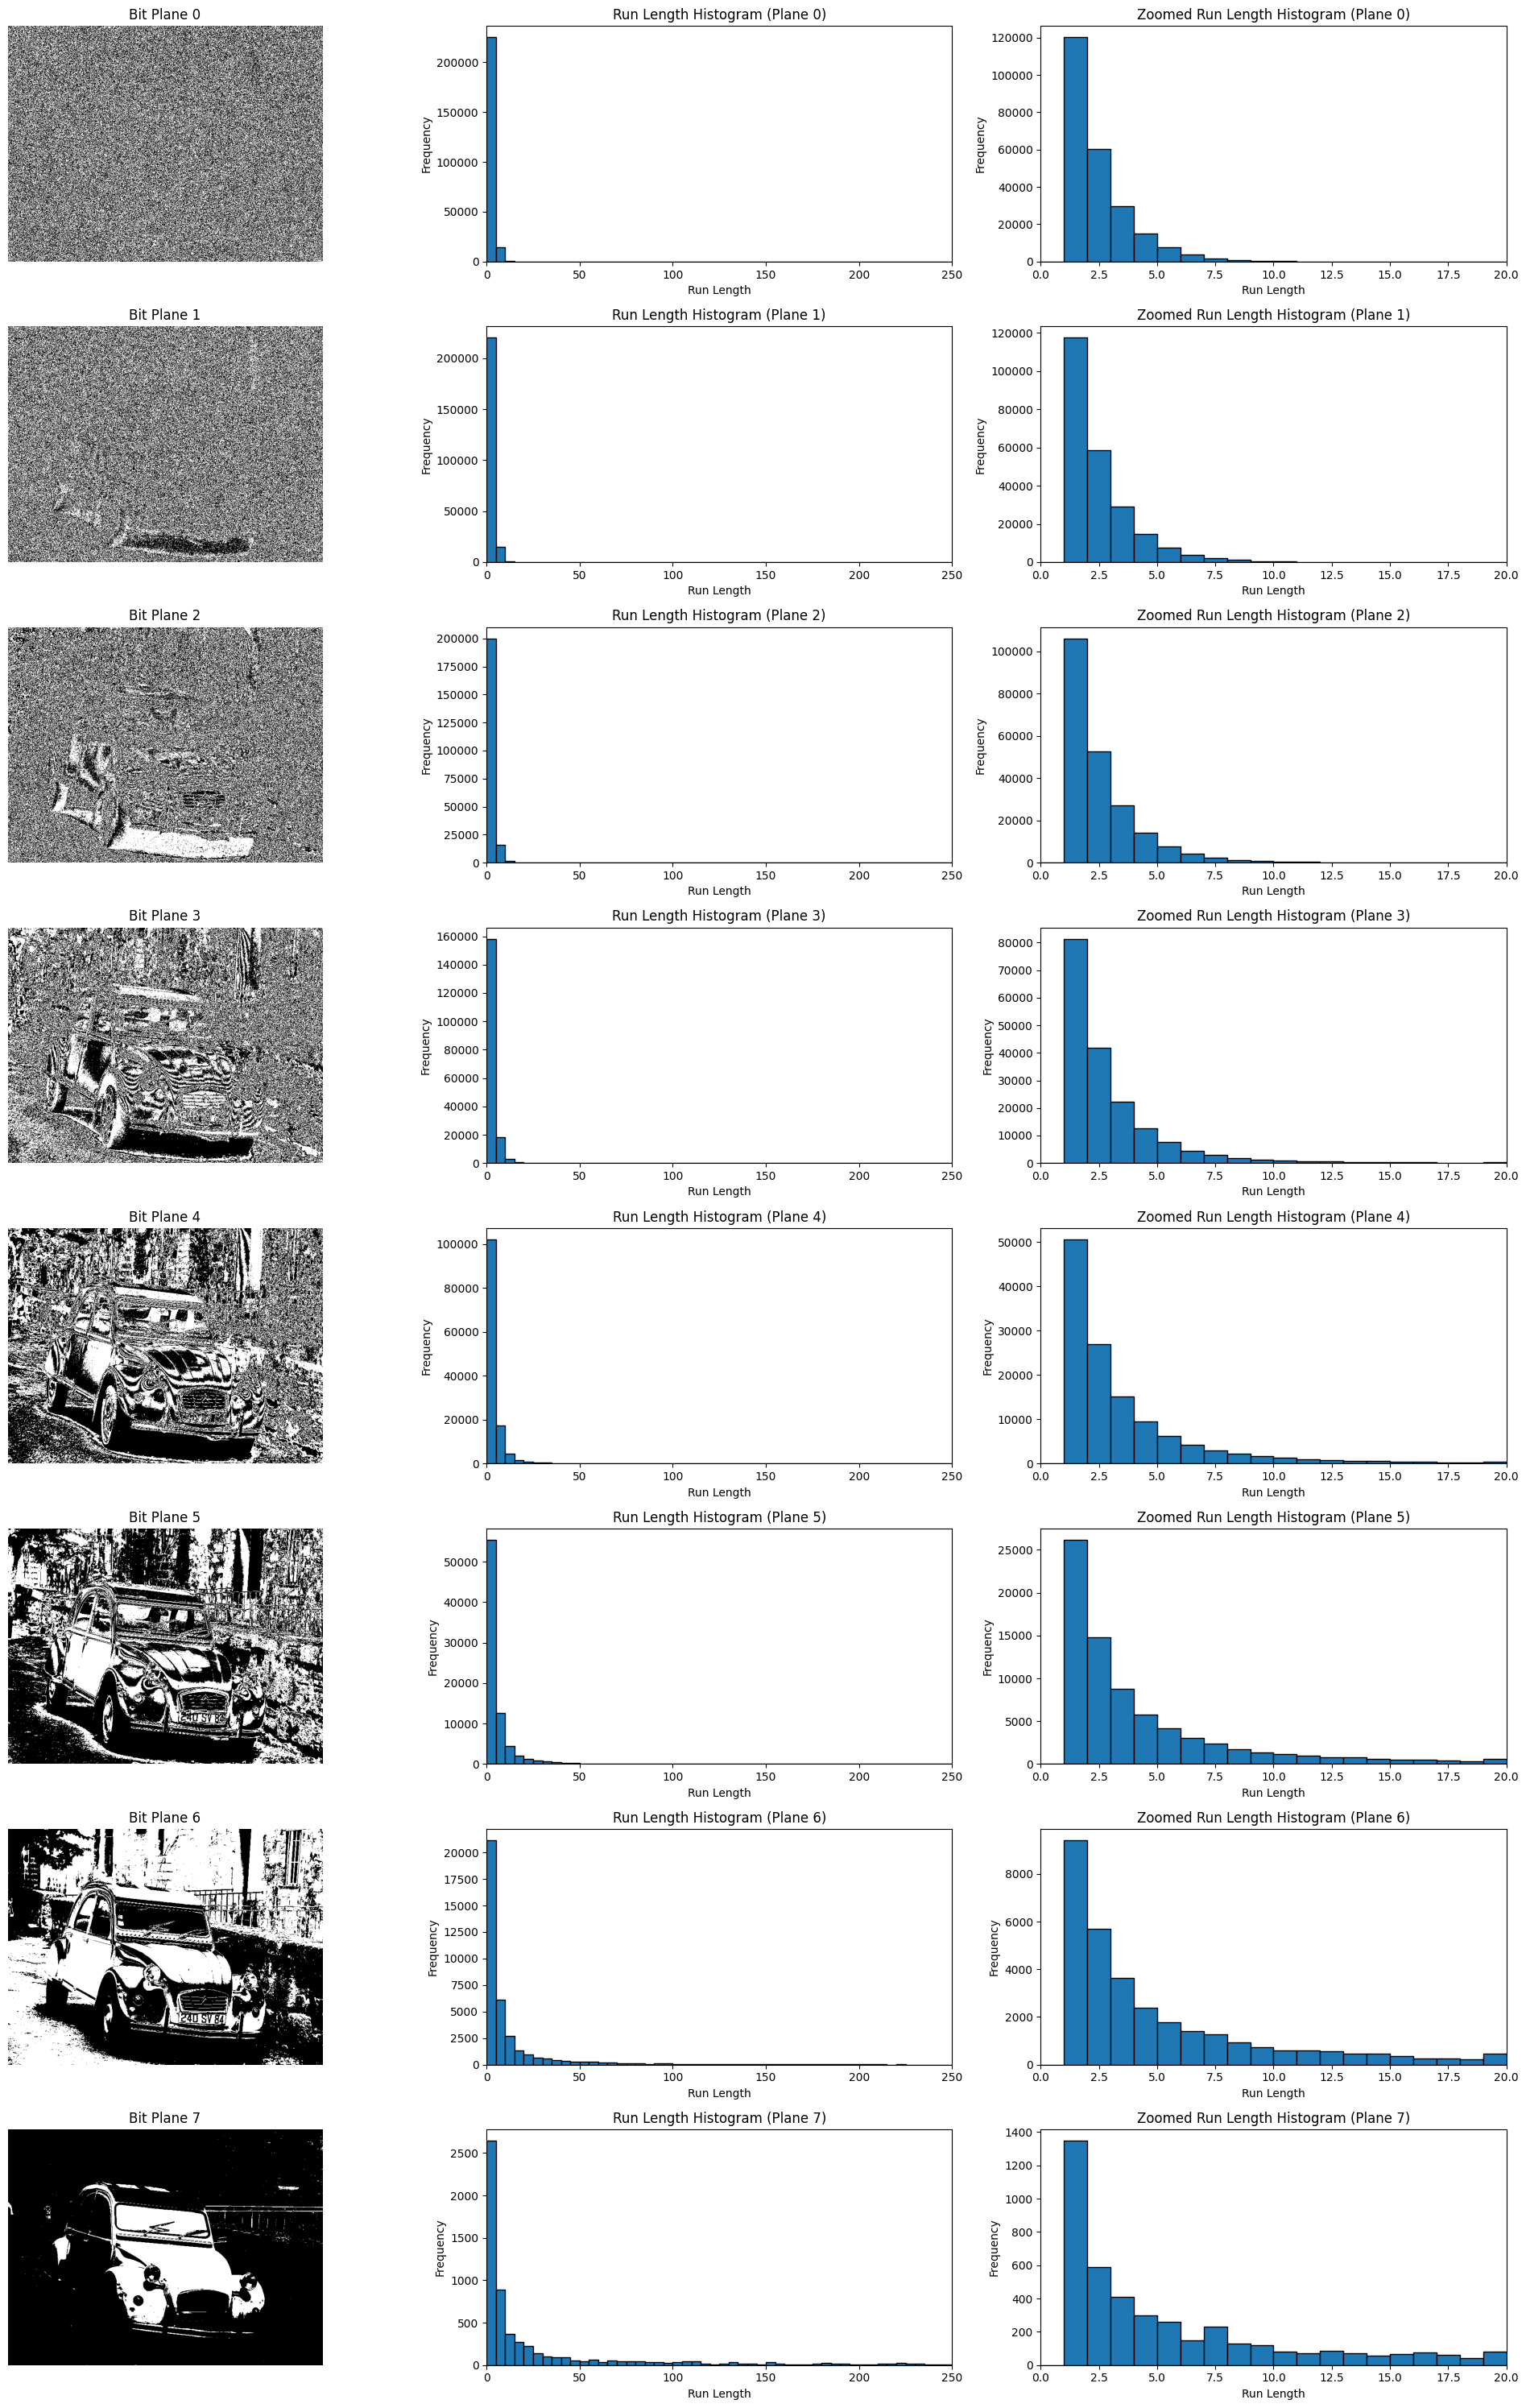

In [28]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

img = imageio.imread('/Users/positive-expectations/Downloads/images 4/dolly.png', pilmode='L')

# Function to compute run lengths
def compute_run_lengths(plane):
    run_lengths = []
    current_value = plane[0]
    current_length = 1
    for pixel in plane[1:]:
        if pixel == current_value:
            current_length += 1
        else:
            run_lengths.append(current_length)
            current_value = pixel
            current_length = 1
    run_lengths.append(current_length)
    return run_lengths

# Create subplots for bit planes and their histograms
fig, axs = plt.subplots(8, 3, figsize=(20, 30))

for i in range(8):
    # Extract bit plane
    bit_plane = (img >> i) & 1
    
    # Display bit plane
    axs[i, 0].imshow(bit_plane, cmap='gray')
    axs[i, 0].set_title(f'Bit Plane {i}')
    axs[i, 0].axis('off')
    
    # Compute run lengths
    run_lengths = compute_run_lengths(bit_plane.flatten())
    
    # Display histogram of run lengths
    axs[i, 1].hist(run_lengths, bins=np.linspace(0, 250, 51), edgecolor='black')
    axs[i, 1].set_title(f'Run Length Histogram (Plane {i})')
    axs[i, 1].set_xlabel('Run Length')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].set_xlim(0, 250)
    
    # Display zoomed histogram for short run lengths
    axs[i, 2].hist(run_lengths, bins=np.linspace(0, 20, 21), edgecolor='black')
    axs[i, 2].set_title(f'Zoomed Run Length Histogram (Plane {i})')
    axs[i, 2].set_xlabel('Run Length')
    axs[i, 2].set_ylabel('Frequency')
    axs[i, 2].set_xlim(0, 20)
    
    # Print statistics
    num_runs = len(run_lengths)
    avg_run_length = np.mean(run_lengths)
    print(f'Bit Plane {i}:')
    print(f'  Number of runs: {num_runs}')
    print(f'  Average run length: {avg_run_length:.2f}')

plt.tight_layout()
plt.show()


Observations:

1. Higher-order bit planes (6-7) show more distinct features of the image, while lower-order bit planes (0-1) appear more noise-like12.

2. The highest-order bit plane (7) often has the longest run lengths, as it represents the most significant bits which tend to be more consistent across regions2.

3. Lower-order bit planes typically have shorter run lengths and more frequent changes, resulting in higher numbers of runs3.

4. The zoomed histograms reveal that very short run lengths (1-5) are extremely common, especially in lower-order bit planes7.

5. Higher-order bit planes may benefit more from RLE compression due to longer run lengths, while lower-order bit planes might not compress well with RLE alone6.

6. The effectiveness of RLE varies significantly between bit planes, suggesting that a hybrid approach combining RLE with other techniques might be more effective for overall image compression27.

This analysis demonstrates how RLE performance varies across bit planes, providing insights into potential optimizations for image compression algorithms.

**d)** Explain the idea of the *Gray code*. Why is it better suited for run length encoding? Compute a Gray code for a 256 bit image and recode the image `dolly.png`. Then analyze the run lengths of the individual bit planes of the recoded image.

Gray code is a binary numeral system where two successive values differ in only one bit. It was invented by Frank Gray in 1953 and is also known as reflected binary code or unit distance code3. The key properties of Gray code are:

1. Single bit change: Only one bit changes when moving from one value to the next3.

2. Cyclic and reflective: The code sequence has a mirroring effect2.

Gray code is better suited for run length encoding because:

1. It minimizes errors during transitions between values, as only one bit changes at a time12.

2. It reduces the chances of errors in readings, especially in applications like rotary encoders1.

3. The single bit change property leads to longer runs of identical bits in adjacent values, which is ideal for run length encoding5.

To implement Gray code encoding for a 256-bit image and analyze the run lengths, we can use the following code:


Gray Code Bit Plane 0:
  Number of runs: 236229
  Average run length: 2.03
Gray Code Bit Plane 1:
  Number of runs: 221547
  Average run length: 2.17
Gray Code Bit Plane 2:
  Number of runs: 181660
  Average run length: 2.64
Gray Code Bit Plane 3:
  Number of runs: 131141
  Average run length: 3.66
Gray Code Bit Plane 4:
  Number of runs: 82363
  Average run length: 5.83
Gray Code Bit Plane 5:
  Number of runs: 53692
  Average run length: 8.94
Gray Code Bit Plane 6:
  Number of runs: 31901
  Average run length: 15.05
Gray Code Bit Plane 7:
  Number of runs: 6261
  Average run length: 76.67


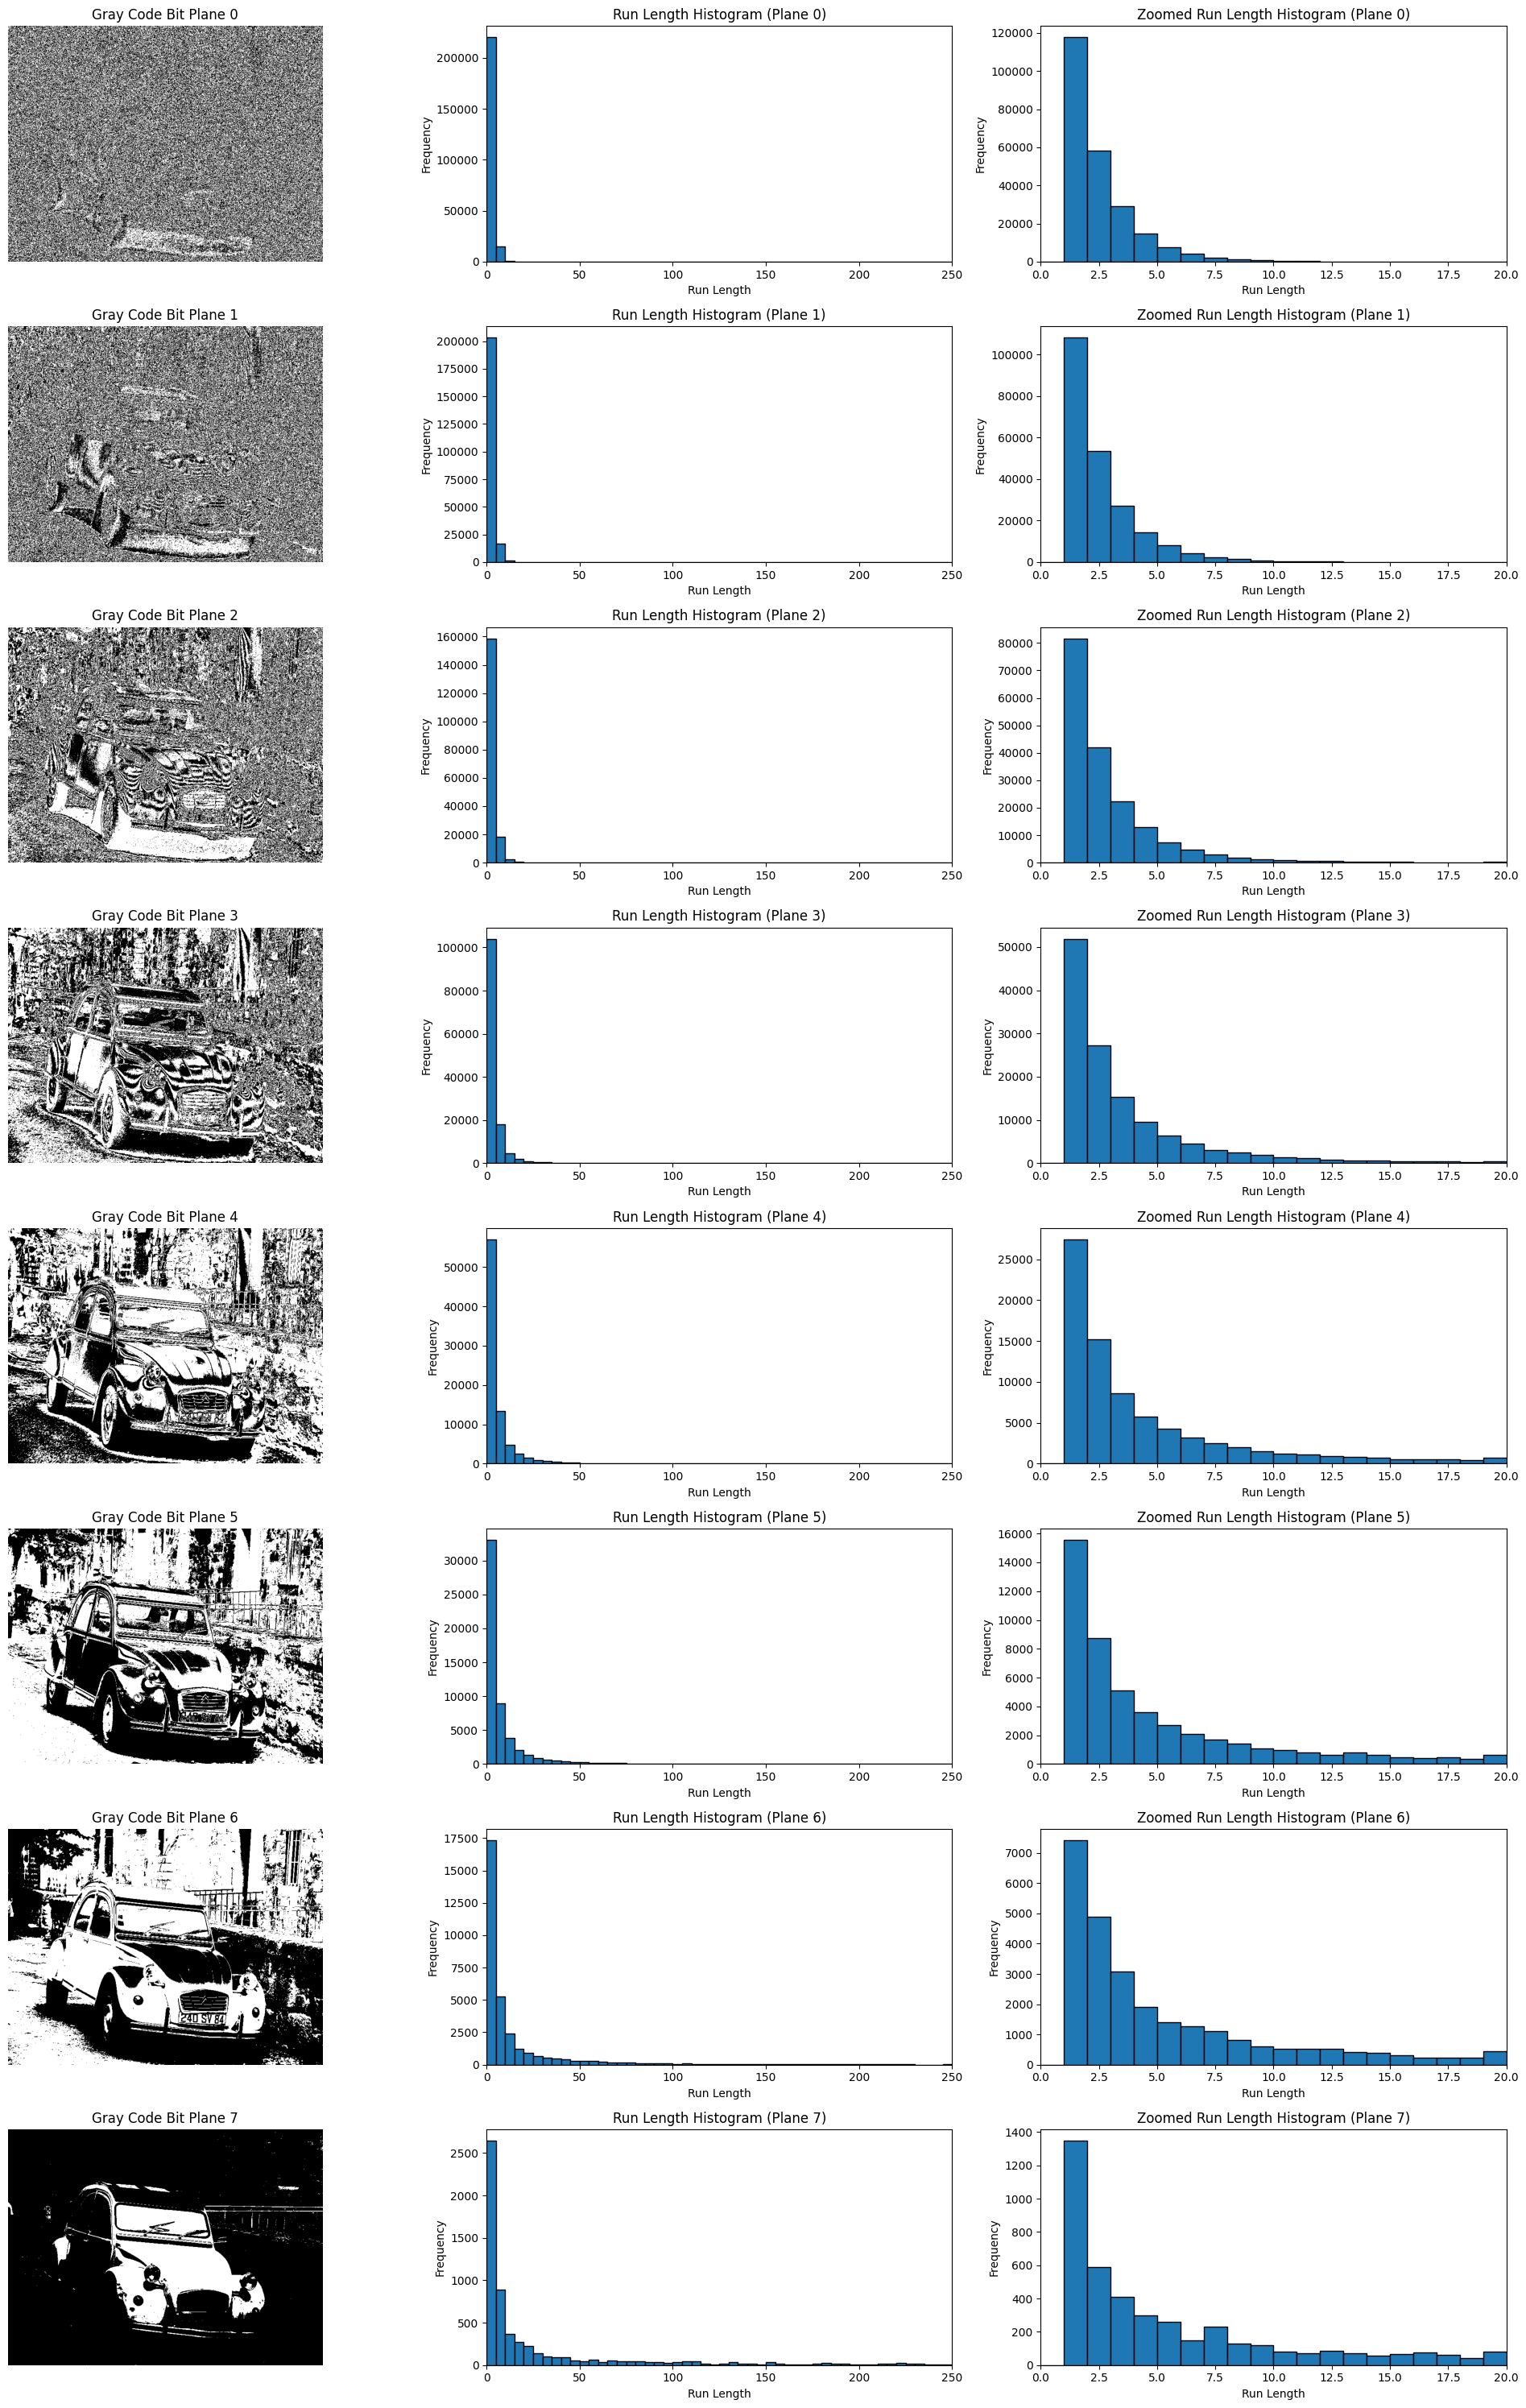

In [29]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

def binary_to_gray(n):
    return n ^ (n >> 1)

def compute_run_lengths(plane):
    run_lengths = []
    current_value = plane[0]
    current_length = 1
    for pixel in plane[1:]:
        if pixel == current_value:
            current_length += 1
        else:
            run_lengths.append(current_length)
            current_value = pixel
            current_length = 1
    run_lengths.append(current_length)
    return run_lengths

img = imageio.imread('/Users/positive-expectations/Downloads/images 4/dolly.png', pilmode='L')

# Convert image to Gray code
gray_img = binary_to_gray(img)

# Create subplots for bit planes and their histograms
fig, axs = plt.subplots(8, 3, figsize=(20, 30))

for i in range(8):
    # Extract bit plane
    bit_plane = (gray_img >> i) & 1
    
    # Display bit plane
    axs[i, 0].imshow(bit_plane, cmap='gray')
    axs[i, 0].set_title(f'Gray Code Bit Plane {i}')
    axs[i, 0].axis('off')
    
    # Compute run lengths
    run_lengths = compute_run_lengths(bit_plane.flatten())
    
    # Display histogram of run lengths
    axs[i, 1].hist(run_lengths, bins=np.linspace(0, 250, 51), edgecolor='black')
    axs[i, 1].set_title(f'Run Length Histogram (Plane {i})')
    axs[i, 1].set_xlabel('Run Length')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].set_xlim(0, 250)
    
    # Display zoomed histogram for short run lengths
    axs[i, 2].hist(run_lengths, bins=np.linspace(0, 20, 21), edgecolor='black')
    axs[i, 2].set_title(f'Zoomed Run Length Histogram (Plane {i})')
    axs[i, 2].set_xlabel('Run Length')
    axs[i, 2].set_ylabel('Frequency')
    axs[i, 2].set_xlim(0, 20)
    
    # Print statistics
    num_runs = len(run_lengths)
    avg_run_length = np.mean(run_lengths)
    print(f'Gray Code Bit Plane {i}:')
    print(f'  Number of runs: {num_runs}')
    print(f'  Average run length: {avg_run_length:.2f}')

plt.tight_layout()
plt.show()
